In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

import shap

In [2]:
data = pd.read_parquet('../data/interim')

In [5]:
data.select_dtypes('number')
x = data[['player_weight','x','y', 's', 'a', 'dir', 'o', 'team_cohesion',]]
y = data['share_team']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [15]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = model.predict(x_test)

In [19]:
mean_squared_error(y_test, y_pred)

0.009709646556293161

In [22]:
mean_absolute_error(y_pred, y_test)

0.060465215642172505

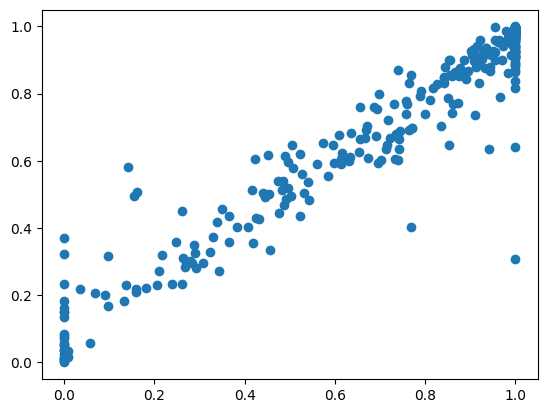

In [24]:
plt.scatter(y_test, y_pred)

In [31]:
    importances = model.feature_importances_


In [33]:
    feature_names = x_train.columns
    feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

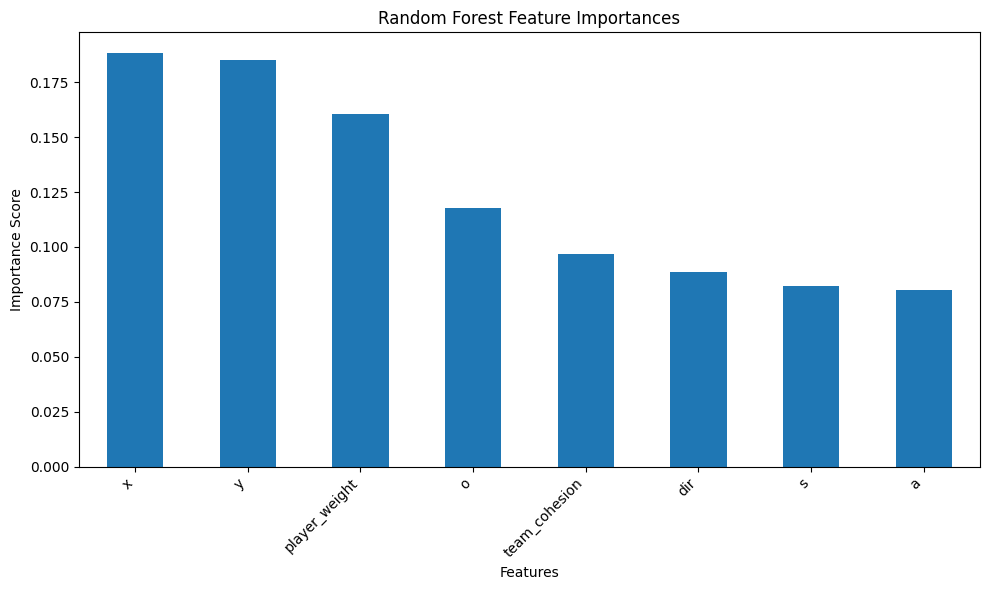

In [34]:
    plt.figure(figsize=(10, 6))
    feature_importance_series.plot(kind='bar')
    plt.title('Random Forest Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

In [41]:
explainer = shap.Explainer(model.predict, x_test)
shap_values = explainer(x_test)

ExactExplainer explainer: 295it [00:28,  6.71it/s]                                 


AttributeError: 'ExactExplainer' object has no attribute 'shap_values'

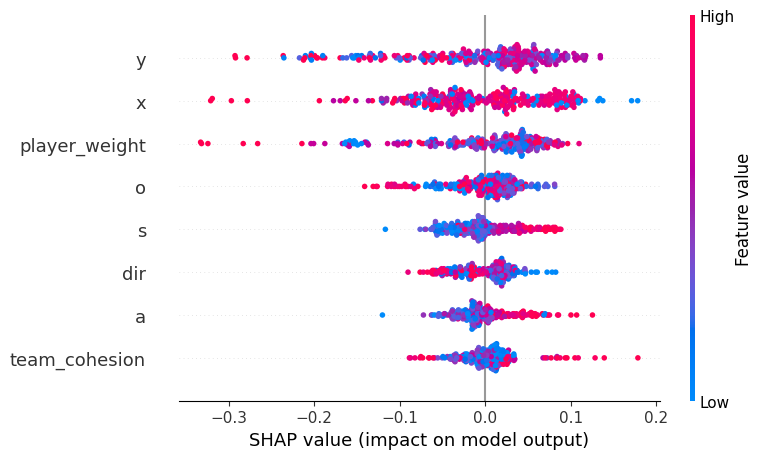

In [42]:
shap.summary_plot(shap_values)


In [ ]:
shap.plots.waterfall(shap_values[0])
